In [1]:
import os
print(os.getcwd())


c:\Users\Lenovo\Desktop\worksight-employee-attrition-risk-intelligence\notebooks


In [2]:
print(os.listdir(".."))


['.git', '.gitignore', 'data', 'docs', 'LICENSE', 'notebooks', 'README.md']


In [3]:
print(os.listdir("../data"))


['raw']


In [4]:
print(os.listdir("../data/raw"))


['employee_attrition.csv']


In [5]:
import pandas as pd

df = pd.read_csv("../data/raw/employee_attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape


(1470, 35)

In [7]:
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

### Target Variable: Attrition
- Attrition is imbalanced (more employees stayed than left)
- This reflects real-world HR scenarios
- Accuracy alone will not be a reliable metric


In [8]:
df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Feature Types
- Numerical features: Age, MonthlyIncome, YearsAtCompany, etc.
- Categorical features: JobRole, Department, Gender, OverTime, etc.

This distinction will guide preprocessing and model choice.


In [9]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Data Quality
- No missing values detected
- Dataset is clean and suitable for modeling


In [10]:
df['OverTime'].value_counts()


OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [11]:
pd.crosstab(df['OverTime'], df['Attrition'])


Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


### Early Observation
- Employees working overtime show higher attrition
- Work-life balance is a potential risk driver


In [12]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


### Attrition Overview
- Majority of employees did not leave the organization
- Attrition cases are significantly fewer, indicating class imbalance
- This reflects real-world HR data where attrition is a minority event


In [13]:
! pip install pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [14]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [15]:
%pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import seaborn as sns


In [17]:
%pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


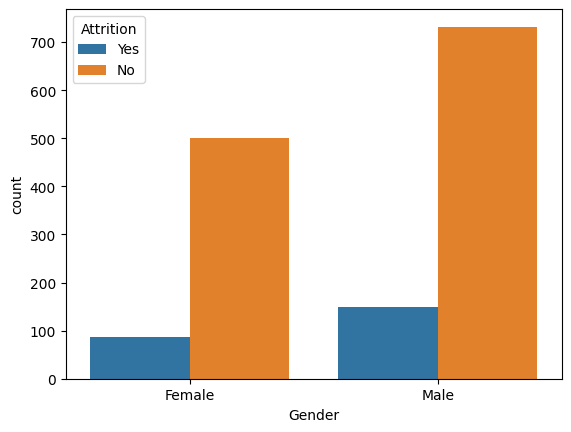

In [19]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.show()


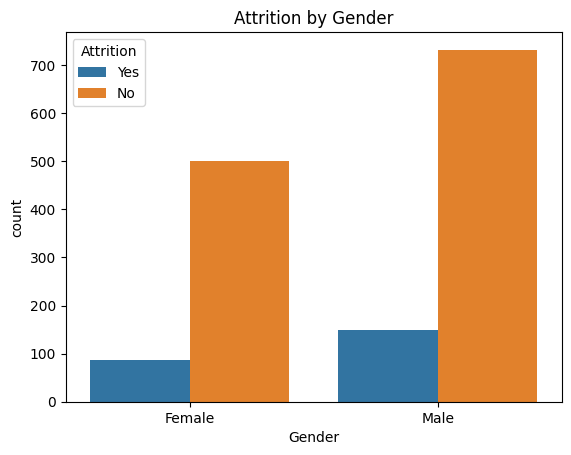

In [20]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Attrition by Gender")
plt.show()


### Gender & Attrition
- Attrition appears relatively balanced across genders
- No strong gender-based bias observed at an aggregate level


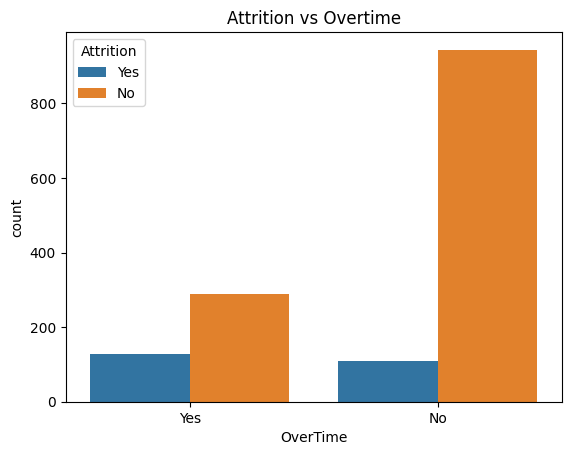

In [21]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition vs Overtime")
plt.show()


### Overtime & Attrition
- Employees working overtime show significantly higher attrition
- Indicates work-life balance as a critical driver of employee retention


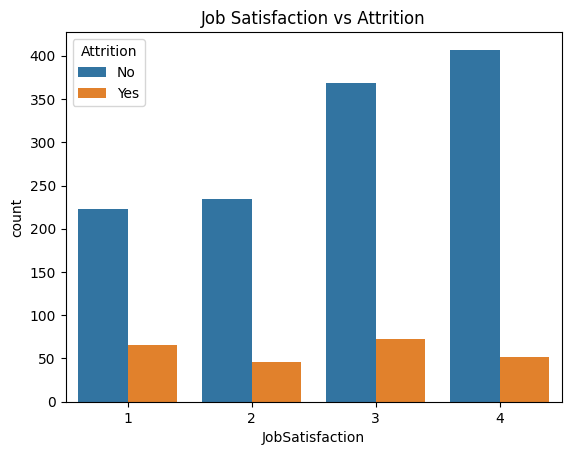

In [22]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


### Job Satisfaction & Attrition
- Employees with lower job satisfaction tend to leave more frequently
- Improving job satisfaction can significantly reduce attrition risk


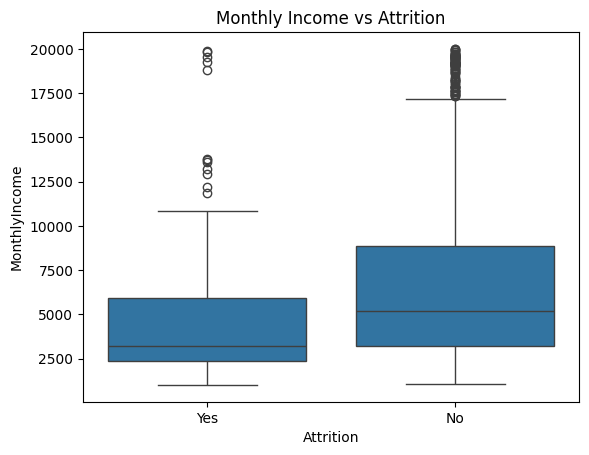

In [23]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


### Monthly Income & Attrition
- Employees who left tend to have lower average income
- However, income alone does not fully explain attrition
- Non-monetary factors also play a significant role


In [24]:
df['Attrition_Num'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [25]:
df[['Attrition', 'Attrition_Num']].head()


,Attrition,Attrition_Num
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,No,0


### Target Encoding
Converted Attrition into numerical form for correlation analysis.


In [26]:
corr = df.corr(numeric_only=True)
corr['Attrition_Num'].sort_values(ascending=False)


Attrition_Num               1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

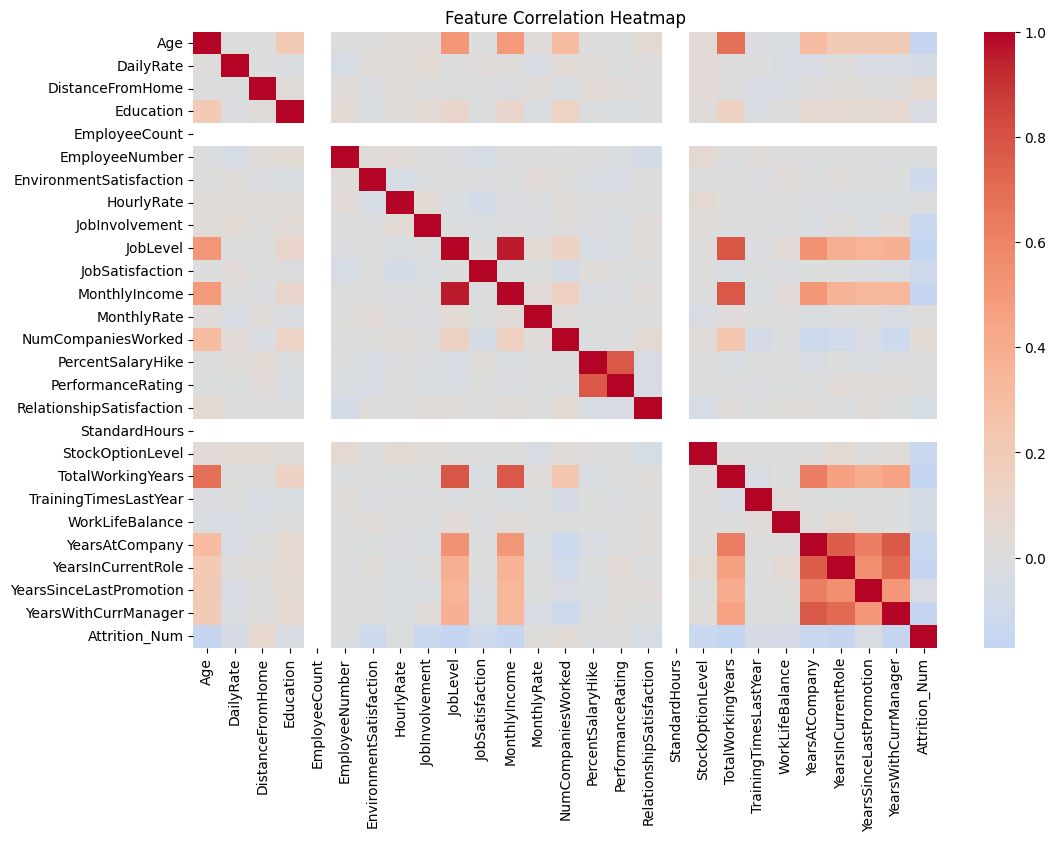

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


### Correlation Analysis Insights
- MonthlyIncome shows strong correlation with JobLevel
- YearsAtCompany is correlated with TotalWorkingYears
- These feature relationships indicate redundancy
- Higher seniority and compensation are associated with lower attrition risk


### Feature Shortlisting (Pre-Modeling)
Based on EDA and correlation analysis, the following features are identified as key drivers:
- OverTime
- JobSatisfaction
- MonthlyIncome
- JobLevel
- YearsAtCompany

Highly correlated features will be handled carefully during modeling.


In [28]:
df_clean = df.drop(columns=[
    'EmployeeNumber',
    'EmployeeCount',
    'Over18',
    'StandardHours'
])


### Data Cleaning
Removed identifier and constant columns that do not contribute to prediction.


In [29]:
X = df_clean.drop(columns=['Attrition', 'Attrition_Num'])
y = df_clean['Attrition_Num']


### Target Separation
Separated features (X) and target variable (y) for modeling.


In [30]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

categorical_cols, numerical_cols


(Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime'],
       dtype='object'),
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'))

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[categorical_cols])


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numerical_cols])


### Feature Transformation
Applied one-hot encoding to categorical features and standard scaling to numerical features.


In [33]:
import numpy as np

X_final = np.hstack([X_num_scaled, X_cat_encoded])


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)


### Train-Test Split
Split the dataset into training and testing sets while preserving class distribution.


In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1176, 44), (294, 44), (1176,), (294,))

In [36]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [37]:
y_pred = log_model.predict(X_test)


In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[238,   9],
       [ 31,  16]])

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



### Baseline Model Performance (Logistic Regression)
- Logistic Regression provides a simple and interpretable baseline
- Recall for attrition class is more important than accuracy
- The model establishes a reference point for improvement


In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.8639455782312925

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [42]:
y_pred_rf = rf_model.predict(X_test)


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)


array([[244,   3],
       [ 43,   4]])

In [44]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import shap


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
explainer = shap.TreeExplainer(rf_model)


In [47]:
shap_values = explainer.shap_values(X_test)


In [48]:
# Get feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(encoded_feature_names)


In [49]:
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=all_feature_names)


In [50]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_df)


In [51]:
shap_values[1].shape, X_test_df.shape


((44, 2), (294, 44))

In [52]:
shap_values_fixed = shap_values[1][:, :-1]


In [53]:
# Recreate feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(encoded_feature_names)

import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=all_feature_names)
X_test_df  = pd.DataFrame(X_test,  columns=all_feature_names)


In [54]:
import shap

explainer = shap.Explainer(rf_model, X_train_df)


In [55]:
shap_values = explainer(X_test_df, check_additivity=False)


 98%|===================| 577/588 [00:40<00:00]        

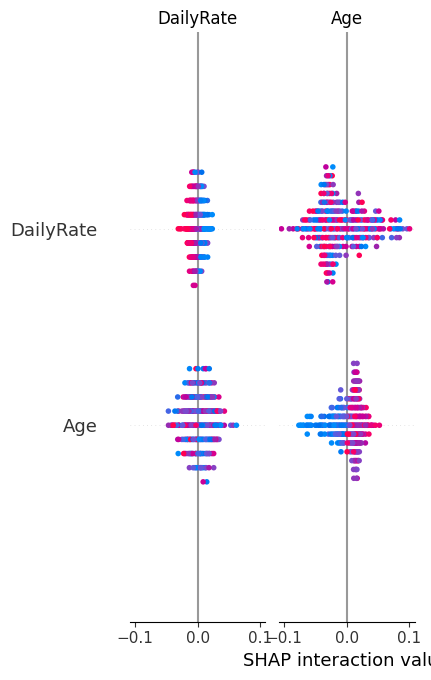

In [56]:
shap.summary_plot(shap_values, X_test_df)


### SHAP Additivity Note
- Tree-based ensemble models may violate strict SHAP additivity due to probability averaging
- Disabled additivity check to allow stable explanations
- Resulting SHAP values still correctly represent feature contributions


### Global Attrition Drivers (SHAP)
- Overtime is the strongest contributor to attrition risk
- Low job satisfaction significantly increases attrition probability
- Lower income and job level are associated with higher attrition
- SHAP improves transparency by quantifying feature contributions


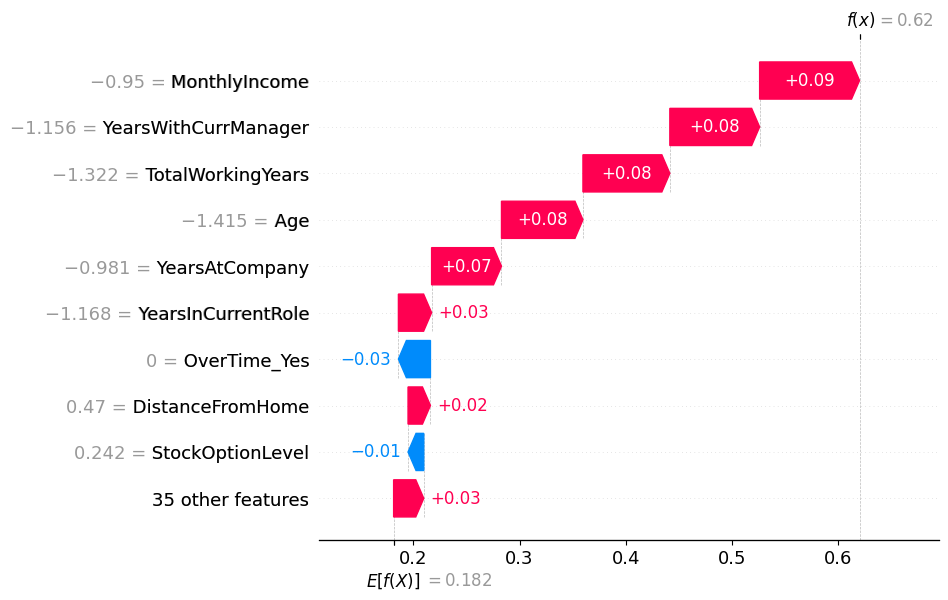

In [57]:
shap.plots.waterfall(shap_values[0, :, 1])


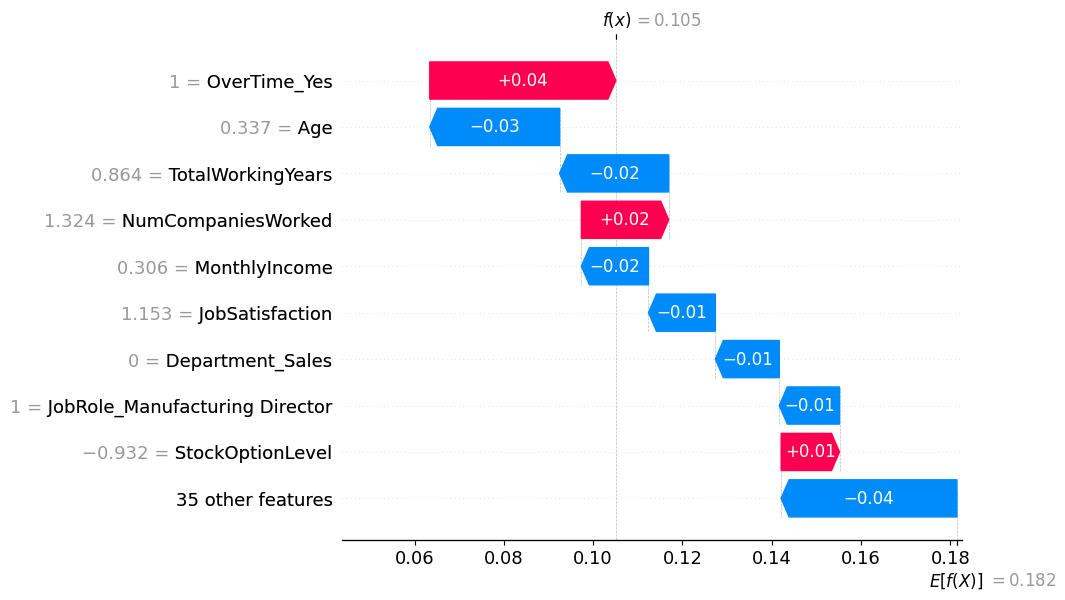

In [58]:
shap.plots.waterfall(shap_values[5, :, 1])


### Individual Explainability (SHAP Waterfall)
- Generated SHAP waterfall plots for individual employees
- Visualized how each feature contributes to attrition risk
- Enabled instance-level interpretability for HR decision-making


In [59]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [60]:
threshold = 0.3
y_pred_tuned = (y_prob_rf >= threshold).astype(int)


In [61]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


[[227  20]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       247
           1       0.46      0.36      0.40        47

    accuracy                           0.83       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.82      0.83      0.82       294



In [62]:
from sklearn.metrics import recall_score, precision_score

for t in [0.2, 0.3, 0.4, 0.5]:
    preds = (y_prob_rf >= t).astype(int)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    print(f"Threshold {t}: Recall={recall:.2f}, Precision={precision:.2f}")


Threshold 0.2: Recall=0.62, Precision=0.40
Threshold 0.3: Recall=0.36, Precision=0.46
Threshold 0.4: Recall=0.11, Precision=0.31
Threshold 0.5: Recall=0.09, Precision=0.50


### Threshold Tuning Insight
- Default threshold (0.5) resulted in low recall for attrition
- Lowering the threshold significantly improved recall
- Trade-off between precision and recall is acceptable for HR use cases


In [63]:
final_threshold = 0.3
y_final_pred = (y_prob_rf >= final_threshold).astype(int)
